# PGPDSE-FT-Bangalore-Dec19-Group 4

<b>Problem Statement</b>

Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.
Prediction task is to determine whether a person makes over 50K a year.

<b>Data Set</b>

Link : http://archive.ics.uci.edu/ml/datasets/Census+Income

Data set was extracted from the census bureau database. There are 48842 instances of data set, mix of continuous and discrete. The data set has 15 attribute which include age, sex, education level and other relevant details of a person.

Listing of attributes:

>50K, <=50K.

age: continuous.<br />
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br />
fnlwgt: continuous.<br />
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br />
education-num: continuous.<br />
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.<br />
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br />
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br />
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br />
sex: Female, Male.<br />
capital-gain: continuous.<br />
capital-loss: continuous.<br />
hours-per-week: continuous.<br />
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


<b>Hypothesis</b>

1. Age : Mid-level age has higher probability to earn more than Low-Level and High-Level aged people<br />
2. Workclass : Private and Self Employed with income have better chances to have higher salary<br />
3. Education : Higher the grade of education better are the chances to have higher salary<br />
4. Occupation : More Critical occupations better are the chances to have higher salary<br />
5. Relationship : Single people will have chances of higher savings<br />
6. Capital Gain : Higher CG better chances of earning high<br />
7. Capital Loss : Lower CL better chances of earning high<br />
8. Hrs per week : Higher HPW better chances of earning high<br />
9. Country : People living in developed countries have better chances of earning high<br />

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignoring Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
census = pd.read_csv("adult.csv")

In [3]:
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
census.shape

(32561, 15)

In [5]:
# Find the distribution of target column to determine if it is a Classification or a Regression Problem

census.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

<b>Binary Classification</b> Problem

In [6]:
# Remove duplicates
census=census.drop_duplicates()
census.shape

(32537, 15)

In [7]:
# Find out all variables that contain missing values

census_na = census.isna().sum()
census_na[census_na.values > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [8]:
census.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

<b>Observations</b>

1. Few duplicates were removed
2. No missing values
3. Numerical columns are 6 and Categorical columns are 8. Target variable is also Categorical.

# Univariate Analysis - Numerical columns

<b>age</b>

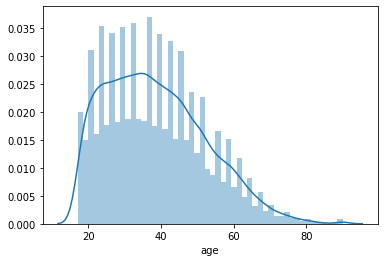

In [9]:
sns.distplot(census["age"])

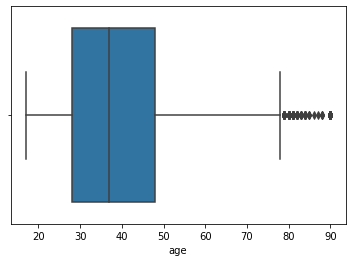

In [10]:
# find outliers
sns.boxplot(x=census["age"])

No unrealistic age present. But we will scale it.

<b>fnlwgt</b>

fnlwgt is not related to the target variable income. We will drop it

In [11]:
census = census.drop('fnlwgt',axis=1)

<b>education and education.num</b>

In [12]:
# Get unique elements in multiple columns i.e. education and education.num
uniqueValues = (census['education'].append(census['education.num'])).unique()
 
print('Unique elements in column "education" & "education.num" :')
print(uniqueValues)

Unique elements in column "education" & "education.num" :
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool' 9 10 4 6 16 15 13 14 7 12 11 2 3 8 5 1]


1 - Preschool<br />
2 - 1st-4th<br />
3 - 5th-6th<br />
4 - 7th-8th<br />
5 - 9th<br />
6 - 10th<br />
7 - 11th<br />
8 - 12th<br />
9 - HS-grad<br />
10 - Some college<br />
11 - Assoc-voc<br />
12 - Assoc-acdm<br />
13 - Bachelors<br />
14 - Masters<br />
15 - Prof-school<br />
16 - Doctorate

As you can see these two columns actually represent the same features, but encoded as strings and as numbers. We don’t need the string representation, so we can just delete this column. Note that it is a much better option to delete the Education column as the Education-Num has the important property that the values are ordered: the higher the number, the higher the education that person has.

In [13]:
census = census.drop('education',axis=1)

<b>capital.gain, capital.loss and hours.per.week</b> can be used in visualtization

# Univariate Analysis - Categorical columns

<b>workclass</b>

We saw in top 5 rows that some have "?" as value. We need to either impute them or drop them.

In [14]:
census["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [15]:
# remove records with ? as value
census.replace({'workclass': {'?': np.nan}}, inplace=True)
census.dropna(axis=0, how='any', inplace=True)

In [16]:
census["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

<b>marital.status</b>

In [17]:
census["marital.status"].value_counts()

Married-civ-spouse       14334
Never-married             9901
Divorced                  4257
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: marital.status, dtype: int64

<b>occupation</b>

In [18]:
census["occupation"].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
?                       7
Name: occupation, dtype: int64

In [19]:
# remove records with ? as value
census.replace({'occupation': {'?': np.nan}}, inplace=True)
census.dropna(axis=0, how='any', inplace=True)

<b>relationship</b>

In [20]:
census["relationship"].value_counts()

Husband           12698
Not-in-family      7852
Own-child          4521
Unmarried          3270
Wife               1435
Other-relative      918
Name: relationship, dtype: int64

<b>sex</b>

In [21]:
census["sex"].value_counts()

Male      20773
Female     9921
Name: sex, dtype: int64

<b>race</b>

In [22]:
census["race"].value_counts()

White                 26280
Black                  2907
Asian-Pac-Islander      973
Amer-Indian-Eskimo      286
Other                   248
Name: race, dtype: int64

<b>native.country</b>

In [23]:
census["native.country"].value_counts()

United-States                 27487
Mexico                          606
?                               555
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Columbia                         56
Poland                           56
Haiti                            42
Taiwan                           42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                      

Majority data is from United States

In [24]:
# remove records with ? as value
census.replace({'native.country': {'?': np.nan}}, inplace=True)
census.dropna(axis=0, how='any', inplace=True)

In [25]:
# check final shape

census.shape

(30139, 13)

# Visualizations

<b>Age vs Income</b>

In [26]:
census_copy = census.copy()

In [27]:
# We will create bins of age

census_copy['age_by_decade'] = pd.cut(x=census_copy['age'], bins=[20, 29, 39, 49, 59, 69, 79, 89, 99], labels=['20s', '30s', '40s', '50s','60s', '70s','80s','90s'])

In [28]:
census_copy['age_by_decade'].value_counts()

30s    8208
40s    6894
20s    6778
50s    4185
60s    1634
70s     357
80s      56
90s      34
Name: age_by_decade, dtype: int64

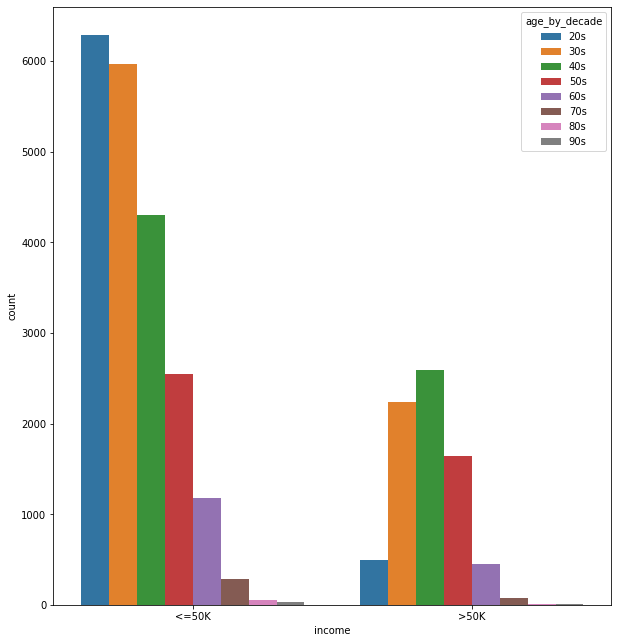

In [29]:
plt.figure(figsize=(10,11))
sns.countplot(x='income', hue='age_by_decade', data=census_copy)

<b>Age : 30s, 40s, 50s have higher probability to earn more than 20s, 60s and beyond</b>

<b>Workclass vs income</b>

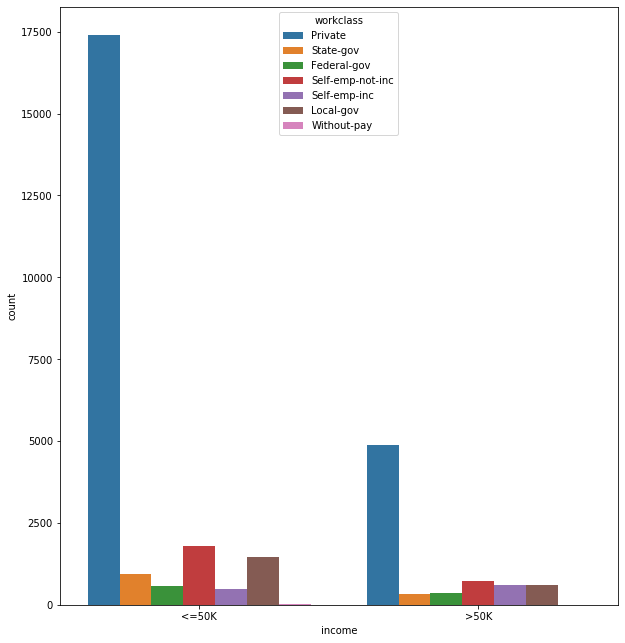

In [30]:
plt.figure(figsize=(10,11))
sns.countplot(x='income', hue='workclass', data=census_copy)

Workclass : Private employees are majority of data here and clearly show that they tend to earn more than other categories. But we see this imbalance because of lesser records for other types of employees

<b>Education vs income</b>

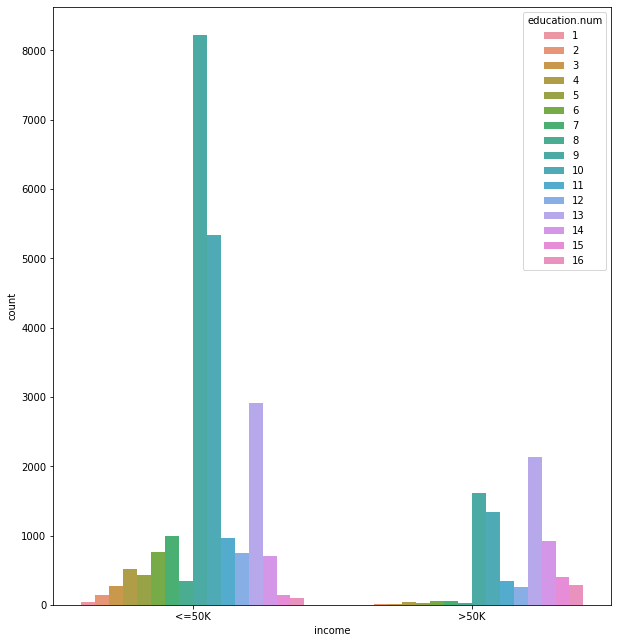

In [31]:
plt.figure(figsize=(10,11))
sns.countplot(x='income', hue='education.num', data=census_copy)

Categories 1-8 : We see that there are insignificant numbers earning > 50k <br />
Categories 9-13 : We see have major contributions in <=50k and >50k earning categories <br />
Categories 14-16 : We see lesser people earning in <=50k category but more people earning in >50k category<br />

Hence in Education : Higher the grade of education better are the chances to have higher salary

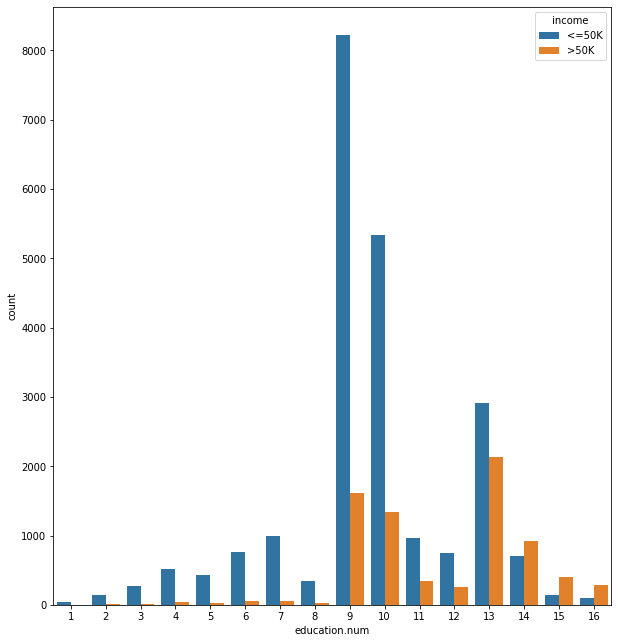

In [32]:
plt.figure(figsize=(10,11))
sns.countplot(x='education.num', hue='income', data=census_copy)

Only a small proportion of people with less than 12 years of education earn more than $50k a year. 

This proportion increases almost linearly after 12 years of education.

<b>Occupation vs income</b>

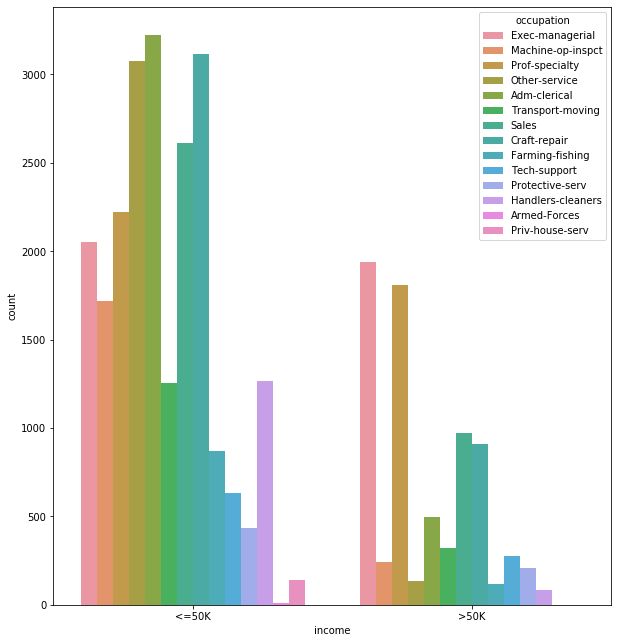

In [33]:
plt.figure(figsize=(10,11))
sns.countplot(x='income', hue='occupation', data=census_copy)

Exec-managerial, Armed forces, Prof-spciality have good numbers in both <=50k and >50k earning categories
In addition, the percentages for Farming, fishing, Other service and Handlers-cleaners are significantly lower than the rest of the distribution.

Hence in Occupation : More Critical occupations better are the chances to have higher salary

<b>Relationship vs income</b>

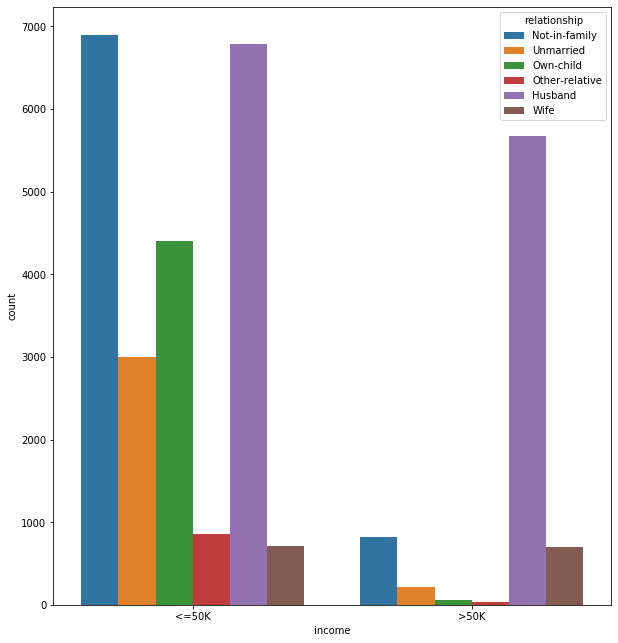

In [34]:
plt.figure(figsize=(10,11))
sns.countplot(x='income', hue='relationship', data=census_copy)

Husband and Wife indivudually or combined are holding significant contributions in >50k earnings

Hence husband and wife without child have better chances of earning >50k than with kid(s) or without being married

<b>sex vs income</b>

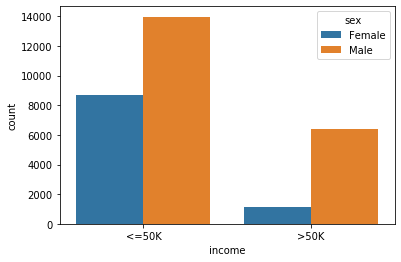

In [35]:
sns.countplot(x='income', hue='sex', data=census_copy)

Males pre-dominantly hold major share in earning >50k. We need to see in combination with other attributes reasons of this earning gap.

<b>hours per week vs income<b/>

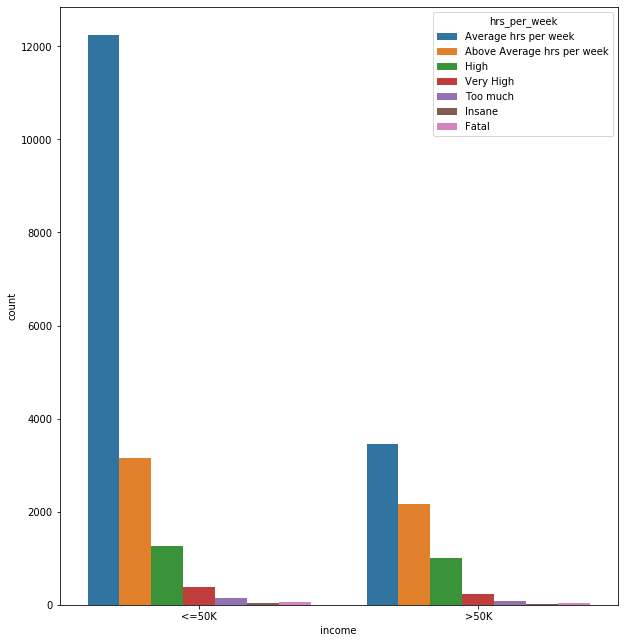

In [36]:
# We will create bins of hours per week
plt.figure(figsize=(10,11))
census_copy['hrs_per_week'] = pd.cut(x=census_copy['hours.per.week'], bins=[35, 44, 54, 64, 74, 84, 94, 104], labels=['Average hrs per week', 'Above Average hrs per week', 'High', 'Very High','Too much', 'Insane','Fatal'])
sns.countplot(x='income', hue='hrs_per_week', data=census_copy)

Hence, Average number of hours in US is considered to be 38. Income definitely increases with increase in number of hours per week but our population majorly works around 38 hours per week which is healthy

We will still try to find more insights for hours per week and try to answer some questions

Average Hours per Week Worked (US) based on :<br />
    Age<br />
    Marital Status<br />
    Gender<br />
    Race<br />
    Employment Type<br />
    Education<br />

<b>Capital Gain and Capital Loss vs income</b>

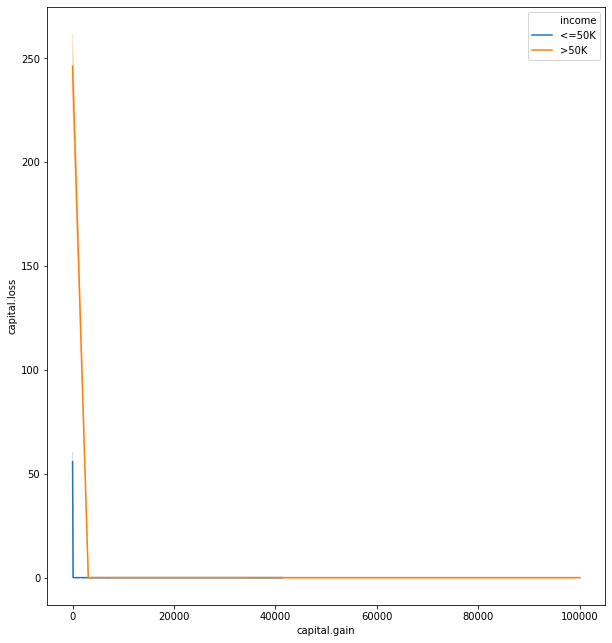

In [37]:
plt.figure(figsize=(10,11))
sns.lineplot(x=census_copy['capital.gain'],y=census_copy['capital.loss'],hue=census_copy['income'])

We do not get much insights from both attributes

<b>Race vs income</b>

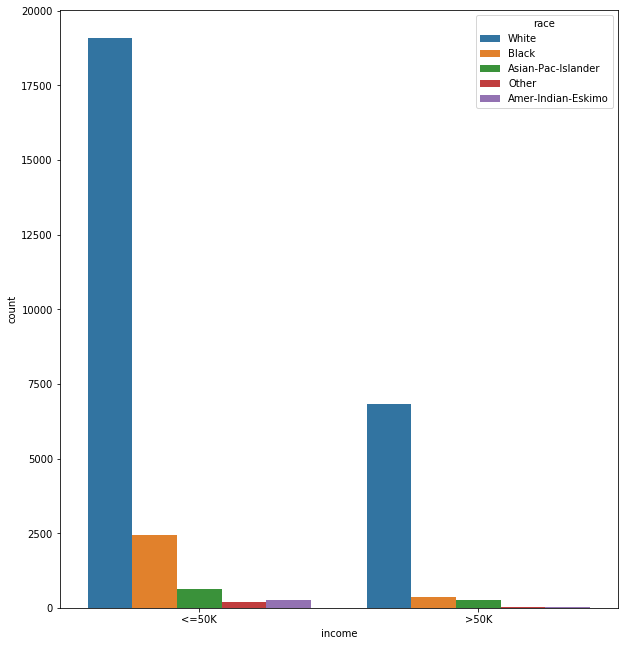

In [38]:
plt.figure(figsize=(10,11))
sns.countplot(x='income', hue='race', data=census_copy)

As expected since it is a United States census data so we would have Whites in majority. As Whites and Asians have a larger percentage of entries greater than >50k than the rest of the races. However, the sample size of Whites in the dataset is disproportionately large in comparison to all other races. The second most represented group is Blacks. This is however imbalanced data.

<b>Hours per Week distributions</b>

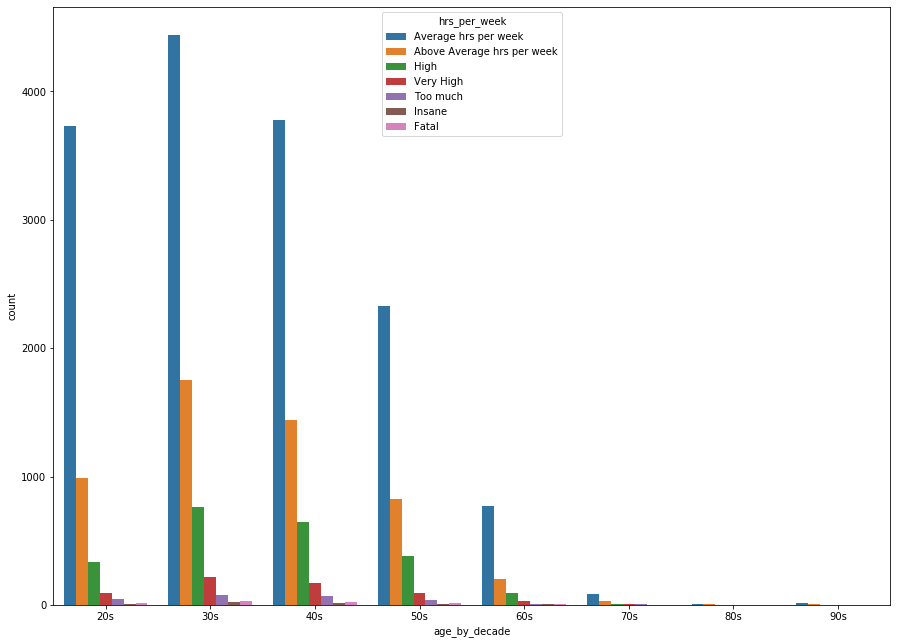

In [39]:
plt.figure(figsize=(15,11))
sns.countplot(x='age_by_decade', hue='hrs_per_week', data=census_copy)

People in their 20s, 30s, 40s tend to work more than 50s and beyond which is understandable. People in their 30s do spend majority of hours per week.

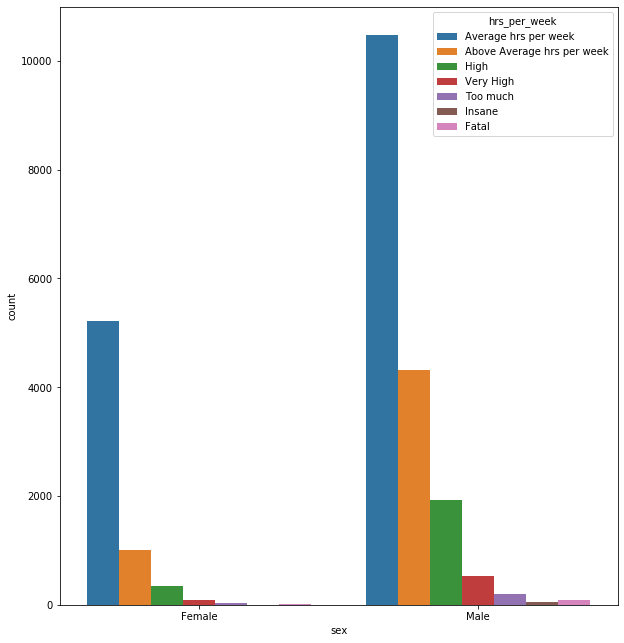

In [40]:
plt.figure(figsize=(10,11))
sns.countplot(x='sex', hue='hrs_per_week', data=census_copy)

Men work longer than women and hence earn more.

# Scaling and Standardization

In [41]:
# We will scale numerical attributes and convert categorical attributes to numerical

In [42]:
census.dtypes

age                int64
workclass         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [43]:
census['income'] = census['income'].replace(to_replace = "<=50K", value = 0)
census['income'] = census['income'].replace(to_replace = ">50K", value = 1)

In [44]:
# converting sex to binary
census['sex'] = census['sex'].replace(to_replace = "Male", value = 1)
census['sex'] = census['sex'].replace(to_replace = "Female", value = 0)

In [45]:
# Replace native.country with United-States = 1 and non-US = 0
census['native.country'] = census['native.country'].replace(to_replace ="United-States", value = 1)
census['native.country'] = census['native.country'].replace(to_replace = ["Mexico", "Greece", "Vietnam", "China", "Taiwan", "India", "Philippines", "Trinadad&Tobago", "Canada", "South", "Holand-Netherlands", "Puerto-Rico", "Poland", "Iran", "England", "Germany", "Italy", "Japan", "Hong", "Honduras", "Cuba", "Ireland", "Cambodia", "Peru", "Nicaragua", "Dominican-Republic", "Haiti", "Hungary", "Columbia", "Guatemala", "El-Salvador", "Jamaica", "Ecuador", "France", "Yugoslavia", "Portugal", "Laos", "Thailand", "Outlying-US(Guam-USVI-etc)", "Scotland"], value = 0)

In [46]:
# Replace marital.status with Couple = 0 and non-Couple = 1
census['marital.status'] = census['marital.status'].replace(to_replace = ["Divorced","Married-spouse-absent","Never-married","Separated","Widowed"], value = 1)
census['marital.status'] = census['marital.status'].replace(to_replace = ["Married-AF-spouse","Married-civ-spouse"], value = 0)

In [47]:
# Map relationship with integers

rel_map = {'Unmarried':0,'Wife':1,'Husband':2,'Not-in-family':3,'Own-child':4,'Other-relative':5}

census['relationship'] = census['relationship'].map(rel_map)

In [48]:
# Map race with integers

race_map={'White':0,'Amer-Indian-Eskimo':1,'Asian-Pac-Islander':2,'Black':3,'Other':4}

census['race']= census['race'].map(race_map)

In [49]:
# Map workclass with integers

def f(x):
    if x['workclass'] == 'Federal-gov' or x['workclass']== 'Local-gov' or x['workclass']=='State-gov': return 'govt'
    elif x['workclass'] == 'Private': return 'private'
    elif x['workclass'] == 'Self-emp-inc' or x['workclass'] == 'Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
census['workclass']=census.apply(f, axis=1)

workclass_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}

census['workclass'] = census['workclass'].map(workclass_map)

In [50]:
# Since workclass is already mapped to govt, private, self-employed and without-pay so occupation is not required
# We will drop it

census = census.drop('occupation',axis=1)

In [51]:
census.dtypes

age               int64
workclass         int64
education.num     int64
marital.status    int64
relationship      int64
race              int64
sex               int64
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int64
income            int64
dtype: object

<b>!!! Our dataset is transformed to numerical attributes !!!</b>

In [52]:
census.describe()

,age,workclass,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,0.977139,10.122532,0.532831,2.380802,0.379774,0.675736,1092.841202,88.439928,40.934703,0.912008,0.249046
std,13.131426,0.512024,2.548738,0.498929,1.200606,0.973385,0.468107,7409.110596,404.445239,11.978753,0.283288,0.432468
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.000000,10.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,47.000000,1.000000,13.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,3.000000,16.000000,1.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


In [53]:
# Now we see the max values of capital.gain and capital.loss
# They need scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
census[["capital.gain","capital.loss"]] = minmaxscaler.fit_transform(census[["capital.gain","capital.loss"]])

In [55]:
census.describe()

,age,workclass,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,0.977139,10.122532,0.532831,2.380802,0.379774,0.675736,0.010929,0.020303,40.934703,0.912008,0.249046
std,13.131426,0.512024,2.548738,0.498929,1.200606,0.973385,0.468107,0.074092,0.092848,11.978753,0.283288,0.432468
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.000000,10.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,47.000000,1.000000,13.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,3.000000,16.000000,1.000000,5.000000,4.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000


# Apply Machine Learning

In [56]:
# split into train, test

from sklearn.model_selection import train_test_split

X= census.drop(['income'],axis=1)
y=census['income']

split_size=0.2

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=split_size,random_state=5)

In [57]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (19288, 11)(19288,)
Validation dataset: (4823, 11)(4823,)
Test dataset: (6028, 11)(6028,)


In [58]:
# Algorithms to test

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
models = []
names = ['LR','Random Forest','GaussianNB','DecisionTreeClassifier','SVM','Gradient Boosting','XGBoost']

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))
models.append((GradientBoostingClassifier()))
models.append((XGBClassifier()))

In [60]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [61]:
kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))    

----------------------------------------
LR: 0.8281152809454696
----------------------------------------
Random Forest: 0.8314327182251711
----------------------------------------
GaussianNB: 0.8129794733568318
----------------------------------------
DecisionTreeClassifier: 0.816089570806552
----------------------------------------
SVM: 0.8104913953970557
----------------------------------------
Gradient Boosting: 0.8519593613933236
----------------------------------------
XGBoost: 0.8538254198631557


## Gradient Boosting and XGBoost give high accuracy. We will further analyze our results on test set.

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

----------------------------------------
Accuracy score:
0.8364299933642999
----------------------------------------
Confusion Matrix:
[[4196  315]
 [ 671  846]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4511
           1       0.73      0.56      0.63      1517

    accuracy                           0.84      6028
   macro avg       0.80      0.74      0.76      6028
weighted avg       0.83      0.84      0.83      6028

----------------------------------------
AUC : 0.74
----------------------------------------
train error: 0.165 | test error: 0.164
train/test: 1.0
----------------------------------------


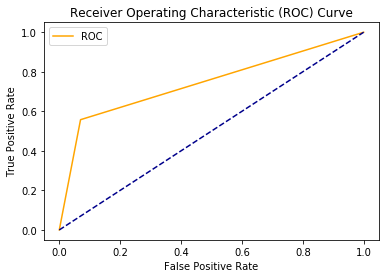

In [63]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))
print ('-'*40)
auc = roc_auc_score(y_test,prediction)
print('AUC : %.2f' %auc)
print ('-'*40)
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, lr)
train_error, test_error = round(train_error, 3), round(test_error, 3)
print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))
print ('-'*40)
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plot_roc_curve(fpr, tpr)

----------------------------------------
Accuracy score:
0.8438951559389516
----------------------------------------
Confusion Matrix:
[[4137  374]
 [ 567  950]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4511
           1       0.72      0.63      0.67      1517

    accuracy                           0.84      6028
   macro avg       0.80      0.77      0.78      6028
weighted avg       0.84      0.84      0.84      6028

----------------------------------------
AUC : 0.77
----------------------------------------
train error: 0.05 | test error: 0.155
train/test: 3.1
----------------------------------------


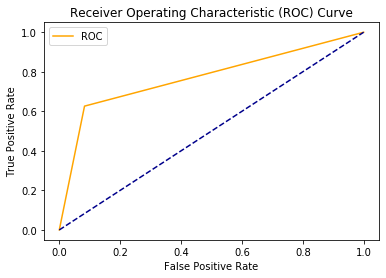

In [64]:
# Random Forest

randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))
print ('-'*40)
auc = roc_auc_score(y_test,prediction)
print('AUC : %.2f' %auc)
print ('-'*40)
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, randomForest)
train_error, test_error = round(train_error, 3), round(test_error, 3)
print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))
print ('-'*40)
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plot_roc_curve(fpr, tpr)

----------------------------------------
Accuracy score:
0.8158593231585932
----------------------------------------
Confusion Matrix:
[[4241  270]
 [ 840  677]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4511
           1       0.71      0.45      0.55      1517

    accuracy                           0.82      6028
   macro avg       0.77      0.69      0.72      6028
weighted avg       0.80      0.82      0.80      6028

----------------------------------------
AUC : 0.69
----------------------------------------
train error: 0.187 | test error: 0.184
train/test: 1.0
----------------------------------------


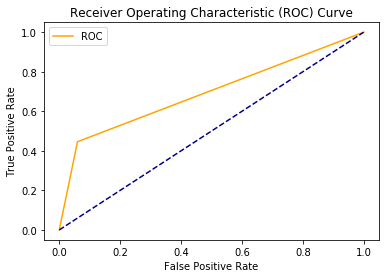

In [65]:
# Gaussian Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train,y_train)
prediction = gnb.predict(X_test)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))
print ('-'*40)
auc = roc_auc_score(y_test,prediction)
print('AUC : %.2f' %auc)
print ('-'*40)
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, gnb)
train_error, test_error = round(train_error, 3), round(test_error, 3)
print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))
print ('-'*40)
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plot_roc_curve(fpr, tpr)

----------------------------------------
Accuracy score:
0.8201725282017253
----------------------------------------
Confusion Matrix:
[[4041  470]
 [ 614  903]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4511
           1       0.66      0.60      0.62      1517

    accuracy                           0.82      6028
   macro avg       0.76      0.75      0.75      6028
weighted avg       0.82      0.82      0.82      6028

----------------------------------------
AUC : 0.75
----------------------------------------
train error: 0.05 | test error: 0.179
train/test: 3.6
----------------------------------------


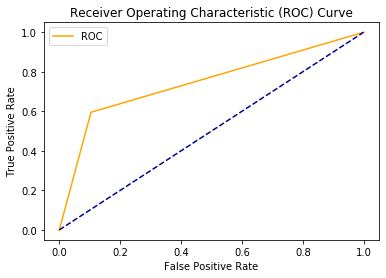

In [66]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
prediction = dt.predict(X_test)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))
print ('-'*40)
auc = roc_auc_score(y_test,prediction)
print('AUC : %.2f' %auc)
print ('-'*40)
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, dt)
train_error, test_error = round(train_error, 3), round(test_error, 3)
print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))
print ('-'*40)
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plot_roc_curve(fpr, tpr)

----------------------------------------
Accuracy score:
0.8183477106834771
----------------------------------------
Confusion Matrix:
[[4176  335]
 [ 760  757]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.85      0.93      0.88      4511
           1       0.69      0.50      0.58      1517

    accuracy                           0.82      6028
   macro avg       0.77      0.71      0.73      6028
weighted avg       0.81      0.82      0.81      6028

----------------------------------------
AUC : 0.71
----------------------------------------
train error: 0.151 | test error: 0.182
train/test: 1.2
----------------------------------------


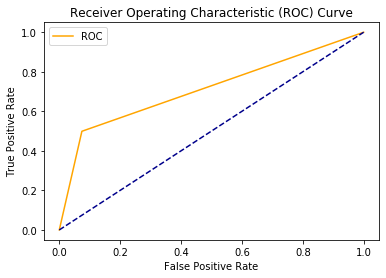

In [67]:
# Support Vector Machines

svm = SVC()
svm.fit(X_train,y_train)
prediction = svm.predict(X_test)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))
print ('-'*40)
auc = roc_auc_score(y_test,prediction)
print('AUC : %.2f' %auc)
print ('-'*40)
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, svm)
train_error, test_error = round(train_error, 3), round(test_error, 3)
print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))
print ('-'*40)
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plot_roc_curve(fpr, tpr)

----------------------------------------
Accuracy score:
0.8599867285998672
----------------------------------------
Confusion Matrix:
[[4279  232]
 [ 612  905]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4511
           1       0.80      0.60      0.68      1517

    accuracy                           0.86      6028
   macro avg       0.84      0.77      0.80      6028
weighted avg       0.86      0.86      0.85      6028

----------------------------------------
AUC : 0.77
----------------------------------------
train error: 0.138 | test error: 0.14
train/test: 1.0
----------------------------------------


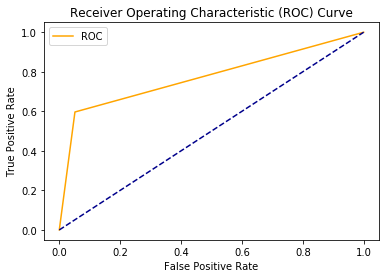

In [68]:
# Gradient Boosting Classifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
prediction = gbc.predict(X_test)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))
print ('-'*40)
auc = roc_auc_score(y_test,prediction)
print('AUC : %.2f' %auc)
print ('-'*40)
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, gbc)
train_error, test_error = round(train_error, 3), round(test_error, 3)
print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))
print ('-'*40)
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plot_roc_curve(fpr, tpr)

----------------------------------------
Accuracy score:
0.8576642335766423
----------------------------------------
Confusion Matrix:
[[4267  244]
 [ 614  903]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4511
           1       0.79      0.60      0.68      1517

    accuracy                           0.86      6028
   macro avg       0.83      0.77      0.79      6028
weighted avg       0.85      0.86      0.85      6028

----------------------------------------
AUC : 0.77
----------------------------------------
train error: 0.139 | test error: 0.142
train/test: 1.0
----------------------------------------


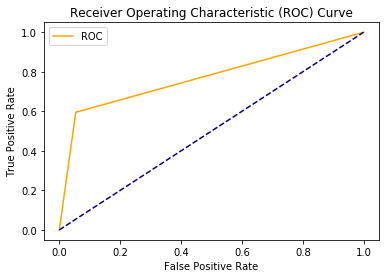

In [69]:
# XGBoost Classifier

xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)
prediction = xgbc.predict(X_test)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))
print ('-'*40)
auc = roc_auc_score(y_test,prediction)
print('AUC : %.2f' %auc)
print ('-'*40)
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, xgbc)
train_error, test_error = round(train_error, 3), round(test_error, 3)
print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))
print ('-'*40)
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plot_roc_curve(fpr, tpr)

## Observing AUC score and other validation values we come to a conclusion that Gradient Boosting gives best accuracy. We will still try to fine tune it.

# Feature Importance - Gradient Boosting

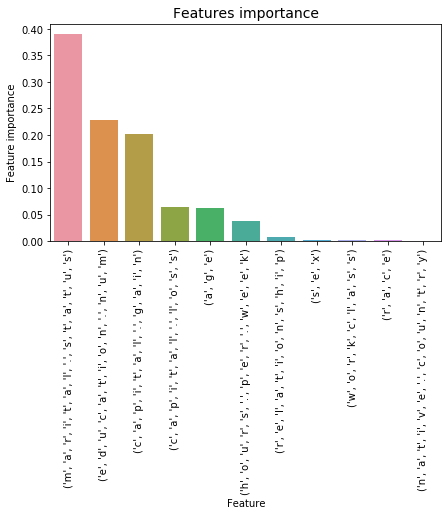

In [70]:
tmp = pd.DataFrame({'Feature': X, 'Feature importance': gbc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

# Feature Importance - XGBoost Classifier

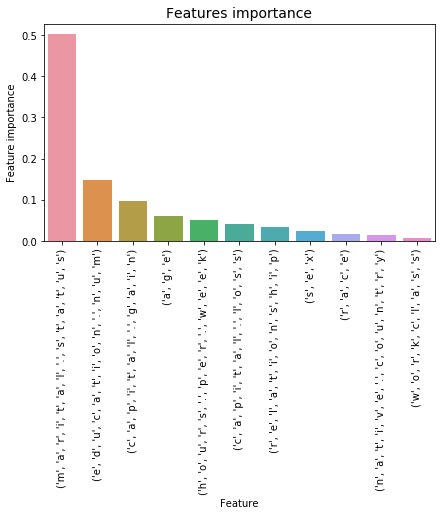

In [71]:
tmp = pd.DataFrame({'Feature': X, 'Feature importance': xgbc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

<b>All features are important. We cannot drop any attribute</b>

# Hyper Parameter Tuning - Gradient Boosting

In [72]:
# We will do series of runs from the values given below

#random_state = 42
#learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01,0.8]
#n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
#max_depth = [1,2,3,4,5,6,7,8,9,10 till 32]
#min_samples_split = [0.1 to 1.0] ## degrades the accuracy means it is underfitting so we ignore it
#min_samples_leaf = [0.10,0.15 till 0.45,0.50] ## degrades the accuracy means it is underfitting so we ignore it
#max_features = [1 till 11] ## since we have 11 features in X_test/train ##we get best accuracy at value=11 which is also the default value

----------------------------------------
Accuracy score:
0.8651293961512939
----------------------------------------
Confusion Matrix:
[[4238  273]
 [ 540  977]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4511
           1       0.78      0.64      0.71      1517

    accuracy                           0.87      6028
   macro avg       0.83      0.79      0.81      6028
weighted avg       0.86      0.87      0.86      6028

----------------------------------------
AUC : 0.79
----------------------------------------
train error: 0.128 | test error: 0.135
train/test: 1.1
----------------------------------------


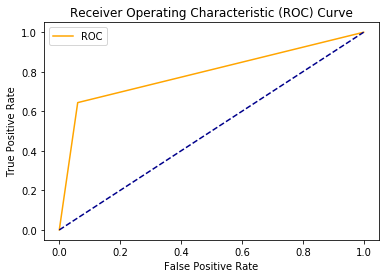

In [73]:
# Gradient Boosting Classifier
# 0.8651293961512939
gbc = GradientBoostingClassifier(random_state=42,learning_rate = 0.25,n_estimators=125,max_depth=3) #best values as per iterations
gbc.fit(X_train, y_train)
prediction = gbc.predict(X_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))
print ('-'*40)
auc = roc_auc_score(y_test,prediction)
print('AUC : %.2f' %auc)
print ('-'*40)
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, gbc)
train_error, test_error = round(train_error, 3), round(test_error, 3)
print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))
print ('-'*40)
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plot_roc_curve(fpr, tpr)

# Hyper Parameter Tuning - XGBoost Classifier

In [74]:
# We will do series of runs from the values given below

#max_depth = [3 to 10]
#min_child_weight = [1 to 6]
#gamma = [0 to 0.5]
#subsample = [0.6,0.7,0.8,0.9]
#colsample_bytree = [0.6,0.7,0.8,0.9] ##accuracy degraded so ignored
#reg_alpha = [0, 0.001, 0.005, 0.01, 0.05]
#learning_rate = [0 to 1]
#n_estimators = [0 to 100]

----------------------------------------
Accuracy score:
0.8647976111479762
----------------------------------------
Confusion Matrix:
[[4233  278]
 [ 537  980]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4511
           1       0.78      0.65      0.71      1517

    accuracy                           0.86      6028
   macro avg       0.83      0.79      0.81      6028
weighted avg       0.86      0.86      0.86      6028

----------------------------------------
AUC : 0.79
----------------------------------------
train error: 0.13 | test error: 0.135
train/test: 1.0
----------------------------------------


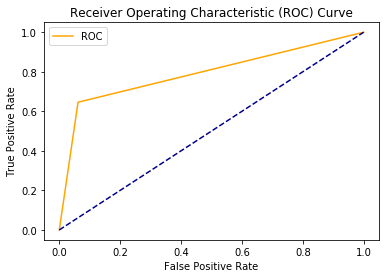

In [75]:
# XGBoost Classifier
#0.8647976111479762
xgbc = XGBClassifier(max_depth=5,min_child_weight=1,gamma=0.5,subsample=0.7,objective= 'binary:logistic', 
                     nthread=4, scale_pos_weight=1,seed=27,reg_alpha=0.05,learning_rate=0.1,n_estimators=100)
xgbc.fit(X_train,y_train)
prediction = xgbc.predict(X_test)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))
print ('-'*40)
auc = roc_auc_score(y_test,prediction)
print('AUC : %.2f' %auc)
print ('-'*40)
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, xgbc)
train_error, test_error = round(train_error, 3), round(test_error, 3)
print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))
print ('-'*40)
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plot_roc_curve(fpr, tpr)

# Conclusion : After Hyper Parameter tuning Gradient Boosting gives best results . Accuracy is almost 87 %. Train and test error has also reduced.